# Machine Learning

## Preparing tools and datasets

In [1]:
import pickle
import urllib
from sklearn.datasets import fetch_mldata
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import fetch_covtype
from sklearn.datasets import fetch_20newsgroups

In [2]:
mnist = fetch_mldata("MNIST original")
pickle.dump(mnist, open( "mnist.pickle", "wb" ))

In [3]:
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with urllib.request.urlopen(target_page) as response:
    with open('ijcnn1.bz2','wb') as W:
        W.write(response.read())

In [4]:
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
cadata = load_svmlight_file(urllib.request.urlopen(target_page))
pickle.dump(cadata, open( "cadata.pickle", "wb" ))

In [5]:
covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
pickle.dump(covertype_dataset, open( "covertype_dataset.pickle", "wb" ))

In [6]:
newsgroups_dataset = fetch_20newsgroups(shuffle=True, remove=('headers', 'footers', 'quotes'),
                                        random_state=6)
pickle.dump(newsgroups_dataset, open( "newsgroups_dataset.pickle", "wb" ))

In [7]:
import os
print("Current working directory:",os.getcwd())

Current working directory: E:\Python Data Science Essentials\Section04


## Linear and logistic regression

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, 
                    boston.target, test_size=0.2, random_state=0)

E:\Anc\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 3.842810589450491


In [10]:
%timeit regr.fit(X_train, Y_train)

The slowest run took 39.41 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 1.46 ms per loop


### $$ i_{th} \ sample = X(i) $$
### $$ target = Y(i) $$

### $$ X(i) * W ≈ Y(i) $$

### $$\begin{bmatrix}
X(0) \\
X(1) \\
\vdots \\
X(n)
\end{bmatrix} * W = \begin{bmatrix}
Y(0) \\
Y(1) \\
\vdots \\
Y(n)
\end{bmatrix} $$

In [11]:
import numpy as np
avg_price_house = np.average(boston.target)
high_priced_idx = (Y_train >= avg_price_house)
Y_train[high_priced_idx] = 1
Y_train[np.logical_not(high_priced_idx)] = 0
Y_train = Y_train.astype(np.int8)
high_priced_idx = (Y_test >= avg_price_house)
Y_test[high_priced_idx] = 1
Y_test[np.logical_not(high_priced_idx)] = 0
Y_test = Y_test.astype(np.int8)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86        61
          1       0.85      0.68      0.76        41

avg / total       0.83      0.82      0.82       102



In [13]:
%timeit clf.fit(X_train, Y_train)

100 loops, best of 3: 3.11 ms per loop


## $$ y_{\_pred_{i}} = sign(X_i * W) $$
### $$ where \ sign(a)= +1 \ if \ a>=0 \ or\ 0 \ otherwise $$

## $$ Prob(y_i = +1\ | \ X_i) = logistic(X_i.W) $$
### $$ where \ logistic(\alpha)= e^\alpha / (1+ e^\alpha) $$

## Naive Bayes

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, 
                    iris.target, test_size=0.2, random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



In [17]:
%timeit clf.fit(X_train, Y_train)

1000 loops, best of 3: 542 µs per loop


#### Compute:
### $$ Prob(Ck|\ X(i)) $$
#### $$ where \ X(i) = [X(i, 0), X(i, 1), X(i, 2), X(i, 3)] $$

#### Bayes' rule:
### $$ Prob(Ck|\ X(i)) = {{Prob(Ck) \ Prob(X(i)\ |\ Ck)} \over {Prob(X(i))}} $$

#### Joint Probability:
### $$ Prob(Ck,\ X(i,0),...,X(i,n)) = {Prob(\ X(i,0),...,X(i,n)\ |\ Ck)} $$

#### Conditional probability
### $$ Prob(\ X(i,0)| \ Ck)\ Prob(\ X(x,1),...,X(i,n)\ |\ Ck,\ X(i,0)) $$

####  Long multiplication:
### $$ Prob(Ck,\ X(i,0),...,X(i,n)) = $$
### $$ ... $$
### $$ Prob(Ck)\ Prob(\ X(i,0)\ |\ Ck) Prob(X(i,1)\ |\ Ck,\ X(i,0))... $$

### $$ Prob(X(i,0)\ |\ Ck,\ X(:)) = Prob(X(i,0)\ |\ Ck) $$

#### Best Class:
### $$ Y_{pred}(i)= argmax_{k=0,1,2,3} \ {Prob(Ck)\ \prod\limits_{k=0}^{n-1}\ Prob(\ X(i,k)\|\ Ck)} $$

## K-Nearest Neighbors

In [18]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

#imports the mnist object previously pickled and dumped to disk
import pickle
mnist = pickle.load(open( "mnist.pickle", "rb" ))

mnist.data, mnist.target = shuffle(mnist.data, mnist.target)

In [19]:
# We reduce the dataset size, otherwise it'll take too much time to run
mnist.data = mnist.data[:1000]
mnist.target = mnist.target[:1000]
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, 
                    mnist.target, test_size=0.8, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# KNN: K=10, default measure of distance (euclidean)
clf = KNeighborsClassifier(3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.92      0.85        72
        1.0       0.66      1.00      0.79       111
        2.0       0.90      0.74      0.82        86
        3.0       0.66      0.75      0.70        68
        4.0       0.58      0.84      0.69        76
        5.0       0.89      0.44      0.59        55
        6.0       0.92      0.92      0.92        74
        7.0       0.79      0.79      0.79        97
        8.0       0.87      0.57      0.69        80
        9.0       0.64      0.31      0.42        81

avg / total       0.77      0.74      0.73       800



In [21]:
%timeit clf.fit(X_train, Y_train)

100 loops, best of 3: 2.98 ms per loop


In [22]:
%timeit clf.predict(X_test)

1 loop, best of 3: 245 ms per loop


## An overview of unsupervised learning

In [24]:
%matplotlib inline

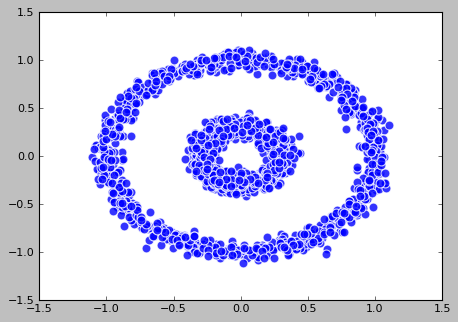

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

N_samples = 2000
dataset_1 = np.array(datasets.make_circles(n_samples=N_samples, noise=0.05, factor=0.3)[0])
dataset_2 = np.array(datasets.make_blobs(n_samples=N_samples, centers=4,
                                         cluster_std=0.4, random_state=0)[0])

plt.scatter(dataset_1[:,0], dataset_1[:,1], c='blue', alpha=0.8, s=64, edgecolors='white')
plt.show()

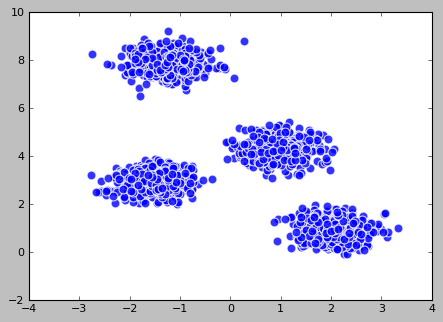

In [26]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], alpha=0.8, s=64, c='blue',edgecolors='white')
plt.show()

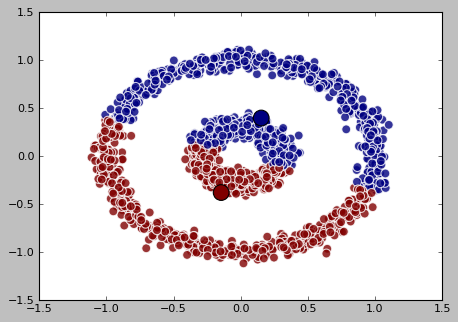

In [39]:
from sklearn.cluster import KMeans
K_dataset_1 = 2
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(dataset_1).labels_

plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=200,
            c=np.unique(labels_1),edgecolors='black')
plt.show()

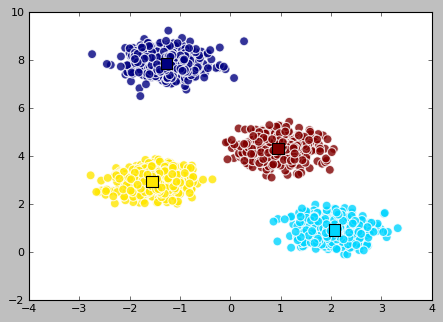

In [29]:
K_dataset_2 = 4
km_2 = KMeans(n_clusters=K_dataset_2)
labels_2 = km_2.fit(dataset_2).labels_

plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], marker='s', s=100,
            c=np.unique(labels_2), edgecolors='black')
plt.show()

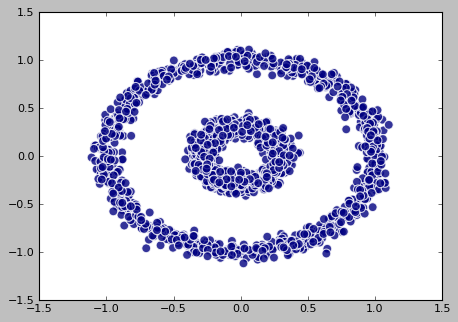

In [47]:
from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps=0.4)
labels_1 = dbs_1.fit(dataset_1).labels_

plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, 
            alpha=0.8, s=64, edgecolors='white')
plt.show()

In [48]:
np.unique(labels_1)

array([0], dtype=int64)

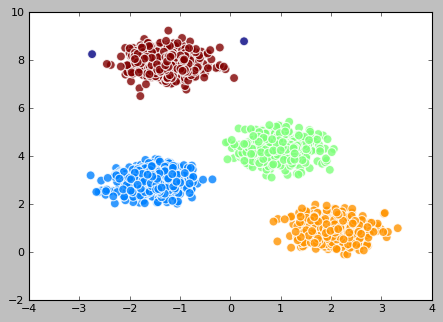

In [49]:
dbs_2 = DBSCAN(eps=0.5)
labels_2 = dbs_2.fit(dataset_2).labels_

plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2,alpha=0.8, s=64, edgecolors='white')
plt.show()

In [50]:
np.unique(labels_2)

array([-1,  0,  1,  2,  3], dtype=int64)

### LDA

In [51]:
import nltk
import gensim
from sklearn.datasets import fetch_20newsgroups

def tokenize(text):
    return [token.lower() for token in gensim.utils.simple_preprocess(text) 
            if token not in gensim.parsing.preprocessing.STOPWORDS]

text_dataset = fetch_20newsgroups(categories=['rec.autos', 
                                              'sci.med'], 
                                  random_state=101,
                                  remove=('headers', 'footers', 
                                          'quotes'))


documents = text_dataset.data
print("Document count:", len(documents))

E:\Anc\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Document count: 1188


In [52]:
 documents[0]

'\nI have a new doctor who gave me a prescription today for something called \nSeptra DS.  He said it may cause GI problems and I have a sensitive stomach \nto begin with.  Anybody ever taken this antibiotic.  Any good?  Suggestions \nfor avoiding an upset stomach?  Other tips?\n'

In [53]:
processed_docs = [tokenize(doc) for doc in documents]
word_dic = gensim.corpora.Dictionary(processed_docs)
print("Num tokens:", len(word_dic))

Num tokens: 16161


In [54]:
word_dic.filter_extremes(no_below=10, no_above=0.2)
bow = [word_dic.doc2bow(doc) for doc in processed_docs]

In [55]:
lda_model = gensim.models.LdaMulticore(bow, num_topics=2, 
                                       id2word=word_dic, passes=10, 
                                       iterations=500)

In [56]:
lda_model.print_topics(-1)

[(0,
  '0.014*"car" + 0.010*"new" + 0.009*"health" + 0.008*"edu" + 0.008*"use" + 0.006*"medical" + 0.006*"information" + 0.006*"cars" + 0.006*"number" + 0.006*"good"'),
 (1,
  '0.009*"people" + 0.008*"think" + 0.008*"edu" + 0.007*"car" + 0.007*"time" + 0.007*"com" + 0.006*"good" + 0.006*"ve" + 0.005*"msg" + 0.005*"right"')]

In [57]:
new_doc = "I've shown the doctor my new car. He loved its big wheels!"

bow_doc = word_dic.doc2bow(tokenize(new_doc))
for index, score in sorted(lda_model[bow_doc], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8310174942016602	 Topic: 0.009*"people" + 0.008*"think" + 0.008*"edu" + 0.007*"car" + 0.007*"time"
Score: 0.16898250579833984	 Topic: 0.014*"car" + 0.010*"new" + 0.009*"health" + 0.008*"edu" + 0.008*"use"


### Word2Vec

In [58]:
from nltk.corpus import movie_reviews
from gensim.models import Word2Vec
w2v = Word2Vec(movie_reviews.sents(), workers=4)
w2v.init_sims(replace=True)

In [59]:
w2v.most_similar('house', topn=5)

E:\Anc\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('body', 0.8581844568252563),
 ('head', 0.8561038970947266),
 ('gun', 0.8512966632843018),
 ('train', 0.8475534915924072),
 ('wedding', 0.8469645977020264)]

In [60]:
w2v.most_similar('countryside', topn=5)

E:\Anc\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('timid', 0.9539802074432373),
 ('nitro', 0.9528506994247437),
 ('lillian', 0.9505326151847839),
 ('jonnie', 0.9483988285064697),
 ('hammer', 0.9468810558319092)]

In [61]:
 w2v['countryside']

E:\Anc\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-6.54591434e-03, -2.90389527e-02,  5.65757975e-02,  1.13596894e-01,
       -2.47904211e-02, -1.25237674e-01, -1.37011558e-01, -5.42441122e-02,
        2.24409048e-02, -4.62665875e-03,  1.87218025e-01, -4.88502197e-02,
        4.88999300e-02,  3.43854986e-02,  5.16173914e-02, -4.95056994e-02,
        6.05361648e-02, -4.39885724e-03,  5.59837855e-02, -5.31184860e-03,
       -2.77946759e-02, -1.03473835e-01,  9.04978588e-02,  6.57181293e-02,
        1.36570595e-02,  2.85679046e-02, -7.63818668e-03, -1.25072122e-01,
        4.54877596e-03, -1.44580573e-01, -1.26922727e-01, -2.06067696e-01,
        1.64546087e-01,  7.81913400e-02, -4.11441252e-02,  2.46831477e-02,
       -1.86438158e-01,  8.02150890e-02,  3.99635732e-02, -1.62008375e-01,
       -5.73657639e-02,  2.31850982e-01, -1.02264014e-04,  2.16308255e-02,
        4.78010885e-02, -1.24121226e-01, -2.97083892e-02, -2.56560296e-02,
        3.47318232e-01, -1.02052212e-01, -1.08209804e-01,  1.03952736e-01,
        6.02969937e-02,  

In [62]:
w2v.most_similar(positive=['woman', 'king'], negative=['queen'], topn=3)

E:\Anc\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('man', 0.8265650272369385),
 ('boy', 0.7795150279998779),
 ('girl', 0.7395389080047607)]

In [63]:
w2v.doesnt_match(['bed', 'pillow', 'cake', 'mattress'])

E:\Anc\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'cake'

In [64]:
w2v.similarity('woman', 'girl'), w2v.similarity('woman', 'boy')

E:\Anc\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


(0.9148935238466207, 0.8159830130716981)